In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ins = pd.read_csv('DATA/installments_payments.csv/installments_payments.csv')


In [8]:
ins.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [11]:
ins[['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER', 'AMT_PAYMENT', 'AMT_INSTALMENT']].sort_values(['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER']).head(30)

,SK_ID_PREV,NUM_INSTALMENT_NUMBER,AMT_PAYMENT,AMT_INSTALMENT
512588,1000001,1,6404.310,6404.310
2159480,1000001,2,62039.115,62039.115
1214732,1000002,1,6264.000,6264.000
1631862,1000002,2,6264.000,6264.000
3411021,1000002,3,6264.000,6264.000
1006868,1000002,4,18443.565,18443.565
6145031,1000003,1,4951.350,4951.350
7054246,1000003,2,4951.350,4951.350
4279518,1000003,3,4951.350,4951.350
7126740,1000004,1,3391.110,3391.110


Anomalies

In [4]:
## For each prev ids

gb = ins[['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER', 'AMT_PAYMENT']].groupby(['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'])['AMT_PAYMENT'].sum().reset_index().rename(columns = {'AMT_PAYMENT': 'AMT_PAYMENT_GROUP'})

ins = ins.merge(gb, on= ['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'], how= 'left')
ins

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,AMT_PAYMENT_GROUP
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,26056.035
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,2165.040
...,...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN,0.000
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN,0.000
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN,0.000
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN,0.000


In [7]:
## Payment instalments difference
ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT_GROUP']
ins['PAYMENT_RATIO'] = ins['AMT_INSTALMENT'] / ins['AMT_PAYMENT_GROUP']


In [8]:
## Diff between AMT_PAYMENT and AMT_INSTALMENT and flag id have position values
ins['PAY_OVER_AMOUNT'] = ins['AMT_PAYMENT'] - ins['AMT_INSTALMENT']
ins['PAY_OVER_FLAG'] = ins['PAY_OVER_AMOUNT'].apply(lambda x: 1 if x > 0 else 0)

(-390625.0, 390625.0)

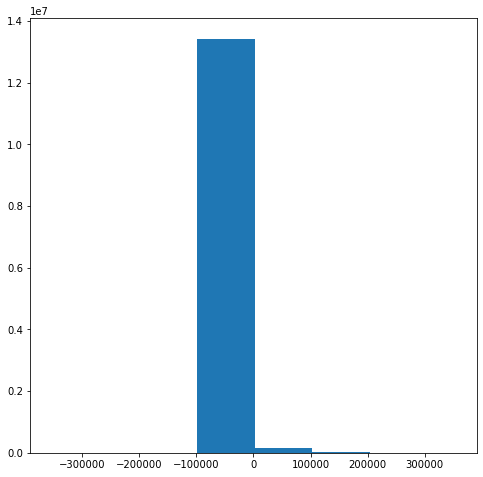

In [17]:
plt.figure(figsize= (8,8))
plt.hist(ins['AMT_PAYMENT'] - ins['AMT_INSTALMENT'], bins=50);
plt.xlim(-25**4, 25**4)

In [15]:
## Days past due and days before due
ins['DAYS_DIFF'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
ins['DPD'] = ins['DAYS_DIFF'].apply(lambda x: 0 if x <= 0 else x)
ins['DBD'] = ins['DAYS_DIFF'].apply(lambda x: 0 if x >= 0 else x)

In [30]:
# flag late payment
ins['LATE_PAYMENT'] = ins['DPD'].apply(lambda x: 1 if x >0 else 0)

# Percentage of payments thay were late
ins['INSTALMENTS_PAYMENT_RATIO'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
ins['LATE_PAYMENT_RATIO'] = ins.apply(lambda x: x['INSTALMENTS_PAYMENT_RATIO'] if x['LATE_PAYMENT'] == 1 else 0, axis= 1)

In [17]:
## Flag k days late payment
ins['DPD_15'] = ins['DPD'].apply(lambda x: 1 if x >= 15 else 0)
ins['DPD_30'] = ins['DPD'].apply(lambda x: 1 if x >= 30 else 0)
ins['DPD_60'] = ins['DPD'].apply(lambda x: 1 if x >= 60 else 0)

In [45]:
## Aggregate ins by SK_ID_CURR
ins_agg = group(ins, 'INS_', INS_AGG)

In [43]:
INS_AGG = {
    'SK_ID_PREV': ['nunique'],
    'DAYS_ENTRY_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_INSTALMENT': ['min', 'max', 'mean'],
    'AMT_INSTALMENT': ['min', 'max', 'mean', 'sum'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
    'DPD': ['max', 'mean', 'var', 'sum'],
    'DBD': ['max', 'mean', 'var'],
    'LATE_PAYMENT': ['mean', 'sum'],
    'PAYMENT_DIFF': ['max', 'mean','sum'],
    'PAYMENT_RATIO': ['mean'],
    'DPD_15': ['mean'],
    'DPD_30': ['mean'],
    'DPD_60': ['mean'],
    'PAY_OVER_FLAG': ['mean'],
    'LATE_PAYMENT_RATIO': ['mean'],
}

In [46]:
ins_agg

,SK_ID_CURR,INS_SK_ID_PREV_NUNIQUE,INS_DAYS_ENTRY_PAYMENT_MIN,INS_DAYS_ENTRY_PAYMENT_MAX,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_DAYS_INSTALMENT_MIN,INS_DAYS_INSTALMENT_MAX,INS_DAYS_INSTALMENT_MEAN,INS_AMT_INSTALMENT_MIN,INS_AMT_INSTALMENT_MAX,...,INS_LATE_PAYMENT_SUM,INS_PAYMENT_DIFF_MAX,INS_PAYMENT_DIFF_MEAN,INS_PAYMENT_DIFF_SUM,INS_PAYMENT_RATIO_MEAN,INS_DPD_15_MEAN,INS_DPD_30_MEAN,INS_DPD_60_MEAN,INS_PAY_OVER_FLAG_MEAN,INS_LATE_PAYMENT_RATIO_MEAN
0,100001,2,-2916.0,-1628.0,-2195.000000,-2916.0,-1619.0,-2187.714286,3951.000,17397.900,...,1,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.142857
1,100002,1,-587.0,-49.0,-315.421053,-565.0,-25.0,-295.000000,9251.775,53093.745,...,0,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.000000
2,100003,3,-2324.0,-544.0,-1385.320000,-2310.0,-536.0,-1378.160000,6662.970,560835.360,...,0,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.000000
3,100004,1,-795.0,-727.0,-761.666667,-784.0,-724.0,-754.000000,5357.250,10573.965,...,0,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.000000
4,100005,1,-736.0,-470.0,-609.555556,-706.0,-466.0,-586.000000,4813.200,17656.245,...,1,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339582,456251,1,-237.0,-38.0,-156.285714,-210.0,-30.0,-120.000000,6605.910,12815.010,...,0,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.000000
339583,456252,1,-2470.0,-2327.0,-2393.833333,-2466.0,-2316.0,-2391.000000,10046.880,10074.465,...,1,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.166667
339584,456253,3,-2915.0,-1738.0,-2387.428571,-2915.0,-1716.0,-2372.928571,2754.450,5575.185,...,1,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.070938
339585,456254,2,-317.0,-18.0,-161.263158,-291.0,-7.0,-142.263158,2296.440,19065.825,...,0,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.000000


In [25]:
(ins['DAYS_ENTRY_PAYMENT'] / (-30)).describe()

count    1.360250e+07
mean     3.503712e+01
std      2.668620e+01
min      3.333333e-02
25%      1.233333e+01
50%      2.756667e+01
75%      5.540000e+01
max      1.640333e+02
Name: DAYS_ENTRY_PAYMENT, dtype: float64

In [48]:
for months in [12, 28, 55]:
    recent_prev = ins[ins['DAYS_ENTRY_PAYMENT'] >= -30*months]['SK_ID_PREV'].unique()
    df = ins[ins['SK_ID_PREV'].isin(recent_prev)]
    prefix = 'INS_{}M_'.format(months)
    ins_agg = group_and_merge(df, ins_agg, prefix, INS_TIME_AGG)

In [47]:
INS_TIME_AGG = {
    'SK_ID_PREV': ['nunique', 'size'],
    'DAYS_ENTRY_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_INSTALMENT': ['min', 'max', 'mean'],
    'AMT_INSTALMENT': ['min', 'max', 'mean', 'sum'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
    'DPD': ['max', 'mean', 'var', 'sum'],
    'DBD': ['max', 'mean', 'var'],
    'LATE_PAYMENT': ['mean'],
    'PAYMENT_DIFF': ['max', 'mean','sum'],
    'PAYMENT_RATIO': ['mean'],
    'DPD_15': ['mean'],
    'DPD_30': ['mean'],
    'DPD_60': ['mean'],
    'PAY_OVER_FLAG': ['mean'],
    'LATE_PAYMENT_RATIO': ['mean'],
}

In [49]:
ins_agg

,SK_ID_CURR,INS_SK_ID_PREV_NUNIQUE,INS_DAYS_ENTRY_PAYMENT_MIN,INS_DAYS_ENTRY_PAYMENT_MAX,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_DAYS_INSTALMENT_MIN,INS_DAYS_INSTALMENT_MAX,INS_DAYS_INSTALMENT_MEAN,INS_AMT_INSTALMENT_MIN,INS_AMT_INSTALMENT_MAX,...,INS_55M_LATE_PAYMENT_MEAN,INS_55M_PAYMENT_DIFF_MAX,INS_55M_PAYMENT_DIFF_MEAN,INS_55M_PAYMENT_DIFF_SUM,INS_55M_PAYMENT_RATIO_MEAN,INS_55M_DPD_15_MEAN,INS_55M_DPD_30_MEAN,INS_55M_DPD_60_MEAN,INS_55M_PAY_OVER_FLAG_MEAN,INS_55M_LATE_PAYMENT_RATIO_MEAN
0,100001,2,-2916.0,-1628.0,-2195.000000,-2916.0,-1619.0,-2187.714286,3951.000,17397.900,...,0.000000,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.000000
1,100002,1,-587.0,-49.0,-315.421053,-565.0,-25.0,-295.000000,9251.775,53093.745,...,0.000000,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.000000
2,100003,3,-2324.0,-544.0,-1385.320000,-2310.0,-536.0,-1378.160000,6662.970,560835.360,...,0.000000,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.000000
3,100004,1,-795.0,-727.0,-761.666667,-784.0,-724.0,-754.000000,5357.250,10573.965,...,0.000000,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.000000
4,100005,1,-736.0,-470.0,-609.555556,-706.0,-466.0,-586.000000,4813.200,17656.245,...,0.111111,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339582,456251,1,-237.0,-38.0,-156.285714,-210.0,-30.0,-120.000000,6605.910,12815.010,...,0.000000,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.000000
339583,456252,1,-2470.0,-2327.0,-2393.833333,-2466.0,-2316.0,-2391.000000,10046.880,10074.465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339584,456253,3,-2915.0,-1738.0,-2387.428571,-2915.0,-1716.0,-2372.928571,2754.450,5575.185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339585,456254,2,-317.0,-18.0,-161.263158,-291.0,-7.0,-142.263158,2296.440,19065.825,...,0.000000,0.000000e+00,0.000000,0.000,1.00000,0.0,0.0,0.0,0.000000,0.000000


In [28]:
gb = ins.sort_values(['SK_ID_CURR', 'SK_ID_PREV'])
gb

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,AMT_PAYMENT_GROUP,PAYMENT_DIFF,PAYMENT_RATIO,PAY_OVER_AMOUNT,PAY_OVER_FLAG,DAYS_DIFF,DPD,DBD,DPD_15,DPD_30,DPD_60
1478621,1369693,100001,1.0,1,-1709.0,-1715.0,3951.000,3951.000,3951.000,0.0,1.0,0.0,0,-6.0,0.0,-6.0,0,0,0
2568722,1369693,100001,1.0,2,-1679.0,-1715.0,3951.000,3951.000,3951.000,0.0,1.0,0.0,0,-36.0,0.0,-36.0,0,0,0
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900,17397.900,0.0,1.0,0.0,0,-9.0,0.0,-9.0,0,0,0
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000,3951.000,0.0,1.0,0.0,0,-11.0,0.0,-11.0,0,0,0
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.050,3982.050,3982.050,0.0,1.0,0.0,0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13582873,2631384,456255,3.0,12,-426.0,-435.0,27489.690,27489.690,27489.690,0.0,1.0,0.0,0,-9.0,0.0,-9.0,0,0,0
13599889,2631384,456255,3.0,9,-516.0,-523.0,27489.690,27489.690,27489.690,0.0,1.0,0.0,0,-7.0,0.0,-7.0,0,0,0
12075210,2729207,456255,2.0,3,-409.0,-435.0,42754.230,42754.230,42754.230,0.0,1.0,0.0,0,-26.0,0.0,-26.0,0,0,0
12300604,2729207,456255,1.0,1,-469.0,-482.0,11514.555,11514.555,11514.555,0.0,1.0,0.0,0,-13.0,0.0,-13.0,0,0,0


In [50]:
ins_agg.to_parquet('TO_TRAIN/ins.gzip', compression= 'gzip', index= False)

In [26]:
# Function to aggregate numeric columns 
def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
    agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
    agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                               for e in agg_df.columns.tolist()])
    return agg_df.reset_index()

# Function to merge numeric and categorical after aggregate
def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
    agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
    return df_to_merge.merge(agg_df, how='left', on= aggregate_by)